<a href="https://colab.research.google.com/github/sanket7293/my_projects/blob/main/ipl_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Data**

In [2]:
df = pd.read_csv('/content/ipl_colab - ipl_colab.csv')
df.sample(10)

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
65514,532,2016-05-02,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson,AD Russell,166,4,18.4,56,1,31,16,185
876,8,2008-04-23,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,MEK Hussey,A Nehra,34,1,3.3,34,1,15,0,208
24449,198,2011-04-26,Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,Y Venugopal Rao,A Mithun,111,3,14.1,43,1,43,22,160
15677,127,2010-03-22,Brabourne Stadium,Kolkata Knight Riders,Mumbai Indians,OA Shah,DJ Bravo,121,1,16.3,48,0,57,20,155
51030,415,2014-05-05,Feroz Shah Kotla,Delhi Daredevils,Chennai Super Kings,M Vijay,IC Pandey,8,0,1.4,8,0,4,0,178
53206,432,2014-05-19,"Sardar Patel Stadium, Motera",Mumbai Indians,Rajasthan Royals,MEK Hussey,JP Faulkner,82,0,10.1,43,0,41,39,178
46412,376,2013-05-13,Wankhede Stadium,Sunrisers Hyderabad,Mumbai Indians,GH Vihari,PP Ojha,135,2,15.1,47,1,34,11,178
8627,71,2009-04-29,Kingsmead,Kolkata Knight Riders,Royal Challengers Bangalore,CH Gayle,P Kumar,43,1,4.5,43,0,20,17,139
46615,378,2013-05-14,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Delhi Daredevils,SK Raina,J Botha,65,1,8.2,53,1,24,3,168
72828,591,2017-04-28,"Punjab Cricket Association IS Bindra Stadium, ...",Sunrisers Hyderabad,Kings XI Punjab,KS Williamson,I Sharma,192,3,18.5,50,2,43,3,207


# **checking missing value**

In [3]:
df.isnull().sum()

,0
mid,0
date,0
venue,0
batting_team,0
bowling_team,0
batsman,0
bowler,0
runs,0
wickets,0
overs,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [6]:
df.nunique()

,0
mid,617
date,442
venue,35
batting_team,14
bowling_team,14
batsman,411
bowler,329
runs,252
wickets,11
overs,140


In [7]:
df.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [8]:
irrelevant = ['mid', 'date', 'venue','batsman','bowler','striker', 'non-striker',]

In [9]:
print(f'before Removing Irrelevent columns :{df.shape}')
data = df.drop(irrelevant,axis=1)
print(f'after Removing Irrelevent columns :{data.shape}')

before Removing Irrelevent columns :(76014, 15)
after Removing Irrelevent columns :(76014, 8)


In [10]:
data.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
teams =['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']
teams

['Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Sunrisers Hyderabad']

In [12]:
data['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['batting_team'].isin(teams)) & (data['bowling_team'].isin(teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')
print(f"Consistent Teams : \n{data['batting_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [14]:
data = data[data['overs']>=5.0]
print(f'After Removing overs : {data.shape}')
data.head()

After Removing overs : (40108, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


<Axes: >

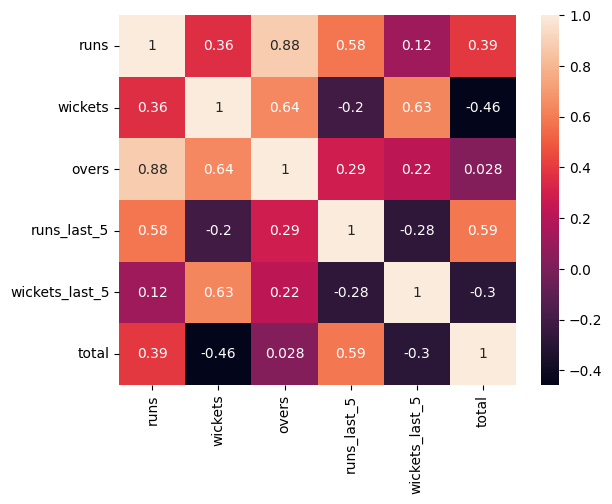

In [15]:
sns.heatmap(data=data[['runs','wickets','overs','runs_last_5','wickets_last_5','total']].corr(),annot=True)

# **apply LabelEncoder and OneHot Encoder**



In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  data[col] = le.fit_transform(data[col])
data.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


# **apply ColumnTransformer**

In [17]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0, 1])],
                                      remainder='passthrough')

In [18]:
data = np.array(columnTransformer.fit_transform(data))

In [19]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data, columns=cols)

In [20]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


In [21]:
x = df.drop(['total'], axis=1)
y = df['total']

In [22]:
print(x.shape)
print(y.shape)

(40108, 21)
(40108,)


# **Train_Test_Split**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [24]:
X_train

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
6415,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,43.0,1.0,6.4,35.0,1.0
13993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,117.0,8.0,19.1,43.0,3.0
10389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,85.0,8.0,15.3,17.0,3.0
25330,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,61.0,7.0,13.4,33.0,1.0
38939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,6.0,8.6,19.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,80.0,6.0,11.6,19.0,3.0
11284,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,84.0,4.0,10.5,34.0,2.0
38158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,148.0,5.0,17.1,45.0,2.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,62.0,4.0,9.1,28.0,2.0


# **Model**

# **1. Decision Tree Regressor**

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)

DecisionTreeRegressor()

# **ModelEvaluation**

In [27]:
train_score_tree = tree.score(X_train,Y_train)
test_score_tree = tree.score(X_test,Y_test)
print('train_score :\n',train_score_tree)
print('test_score :\n',test_score_tree)

train_score :
 0.999884925880814
test_score :
 0.8591762738113907


In [28]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE,r2_score as r2

In [29]:
y_pred_tree = tree.predict(X_test)

In [30]:
print('DICITION TREE REGRESSOR ----> MODEL EVALUATION <-----')

print('mean_absolute_error :',MAE(Y_test,y_pred_tree))
print('mean_squared_error :',MSE(Y_test,y_pred_tree))
print('r2_score :',r2(Y_test,y_pred_tree))

DICITION TREE REGRESSOR ----> MODEL EVALUATION <-----
mean_absolute_error : 3.99869109947644
mean_squared_error : 125.87518698578909
r2_score : 0.8591762738113907


# **2. Linear Regression**

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# **Model Evaluation**

In [33]:
train_score_lr = lr.score(X_train,Y_train)
test_score_lr = lr.score(X_test,Y_test)
print('train_score :\n',train_score_lr)
print('test_score :\n',test_score_lr)

train_score :
 0.6569925392333327
test_score :
 0.667865345679383


In [34]:
y_pred_lr = lr.predict(X_test)

In [35]:
print('LINEAR REGRESSOR ----> MODEL EVALUATION <-----')

print('mean_absolute_error :',MAE(Y_test,y_pred_lr))
print('mean_squared_error :',MSE(Y_test,y_pred_lr))
print('r2_score :',r2(Y_test,y_pred_lr))

LINEAR REGRESSOR ----> MODEL EVALUATION <-----
mean_absolute_error : 12.95397975017034
mean_squared_error : 296.8783233378875
r2_score : 0.667865345679383


# **3. Random Forest Regression**

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
forest = RandomForestRegressor()
forest.fit(X_train,Y_train)

RandomForestRegressor()

# **Model Evaluation**

In [38]:
train_score_forest = forest.score(X_train,Y_train)
test_score_forest = forest.score(X_test,Y_test)
print('train_score :\n',train_score_forest)
print('test_score :\n',test_score_forest)

train_score :
 0.9904470323498323
test_score :
 0.9358414287790012


In [39]:
y_pred_forest = forest.predict(X_test)

In [40]:
print('RANDOM FOREST REGRESSOR ----> MODEL EVALUATION <-----')

print('mean_absolute_error :',MAE(Y_test,y_pred_forest))
print('mean_squared_error :',MSE(Y_test,y_pred_forest))
print('r2_score :',r2(Y_test,y_pred_forest))

RANDOM FOREST REGRESSOR ----> MODEL EVALUATION <-----
mean_absolute_error : 4.438450991915091
mean_squared_error : 57.34809302210843
r2_score : 0.9358414287790012


# **4. Lasso Regression**

In [41]:
from sklearn.linear_model import LassoCV

In [42]:
lasso = LassoCV()
lasso.fit(X_train,Y_train)

LassoCV()

# **Model Evaluation**

In [43]:
train_score_lasso = lasso.score(X_train,Y_train)
test_score_lasso = lasso.score(X_test,Y_test)
print('train_score :\n',train_score_lasso)
print('test_score :\n',test_score_lasso)

train_score :
 0.647065320249974
test_score :
 0.6579689973027167


In [44]:
y_pred_lasso = lasso.predict(X_test)

In [45]:
print('Lasso ----> MODEL EVALUATION <-----')

print('mean_absolute_error :',MAE(Y_test,y_pred_lasso))
print('mean_squared_error :',MSE(Y_test,y_pred_lasso))
print('r2_score :',r2(Y_test,y_pred_lasso))

Lasso ----> MODEL EVALUATION <-----
mean_absolute_error : 12.987000098936154
mean_squared_error : 305.7241672599618
r2_score : 0.6579689973027167


# **5. Support Vector Machine**

In [46]:
from sklearn.svm import SVR

In [47]:
svm = SVR()
svm.fit(X_train,Y_train)

SVR()

# **Model Evaluation**

In [48]:
train_score_svm = svm.score(X_train,Y_train)
test_score_svm = svm.score(X_test,Y_test)
print('train_score :\n',train_score_svm)
print('test_score :\n',test_score_svm)

train_score :
 0.5717519502021231
test_score :
 0.5825637237240144


In [49]:
y_pred_svm = svm.predict(X_test)

In [50]:
print('Support Vector Machine ----> MODEL EVALUATION <-----')

print('mean_absolute_error :',MAE(Y_test,y_pred_svm))
print('mean_squared_error :',MSE(Y_test,y_pred_svm))
print('r2_score :',r2(Y_test,y_pred_svm))

Support Vector Machine ----> MODEL EVALUATION <-----
mean_absolute_error : 14.60905529586537
mean_squared_error : 373.12511714479365
r2_score : 0.5825637237240144


# **6. Neural Network Regression**

In [51]:
from sklearn.neural_network import MLPRegressor

In [52]:
neural = MLPRegressor(activation='logistic', max_iter=500)
neural.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', max_iter=500)

# **Model_Evaluation**

In [53]:
train_score_neural = neural.score(X_train,Y_train)
test_score_neural = neural.score(X_test,Y_test)
print('train_score :\n',train_score_neural)
print('test_score :\n',test_score_neural)

train_score :
 0.8561324277490863
test_score :
 0.8527891616791047


In [54]:
y_pred_nural = neural.predict(X_test)

In [55]:
print('Neural Network Regressor ----> MODEL EVALUATION <-----')

print('mean_absolute_error :',MAE(Y_test,y_pred_nural))
print('mean_squared_error :',MSE(Y_test,y_pred_nural))
print('r2_score :',r2(Y_test,y_pred_nural))

Neural Network Regressor ----> MODEL EVALUATION <-----
mean_absolute_error : 8.170638784781781
mean_squared_error : 131.5843025994032
r2_score : 0.8527891616791047


# ***Best Model Selection***

In [56]:
models=dict()
models["Dicition Tree"]=test_score_tree
models['Linear Regressor']=test_score_lr
models['Random forest']=test_score_forest
models['lasso']= test_score_lasso
models['svm']=test_score_svm
models['Neural Network']=test_score_neural

print(models)

{'Dicition Tree': 0.8591762738113907, 'Linear Regressor': 0.667865345679383, 'Random forest': 0.9358414287790012, 'lasso': 0.6579689973027167, 'svm': 0.5825637237240144, 'Neural Network': 0.8527891616791047}


<ipython-input-57-fbe4e1f66b3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot(x =model_names, y =accuracy, palette='rocket')


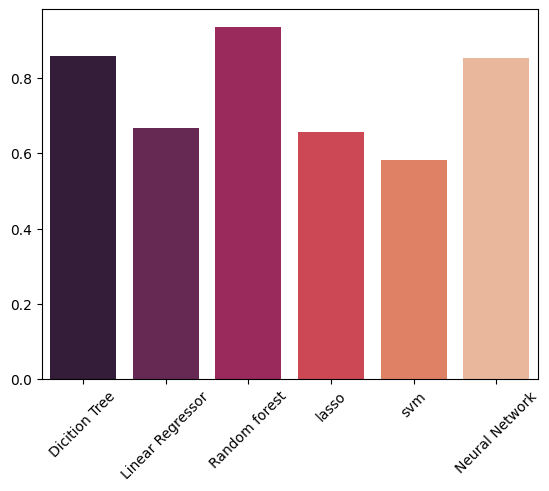

In [57]:
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(x =model_names, y =accuracy, palette='rocket')
plt.xticks(rotation=45)
plt.show()

from above we can see that Random Forest Performed the best , closely followed by Decision Tree and Neural Network. So we will be choosing Random Forest for the final model